In [13]:
import numpy as np
from pydicom import dcmread
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

ds = dcmread("CT_small.dcm")
print(type(ds))

<class 'pydicom.dataset.FileDataset'>


In [14]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

(128, 128)


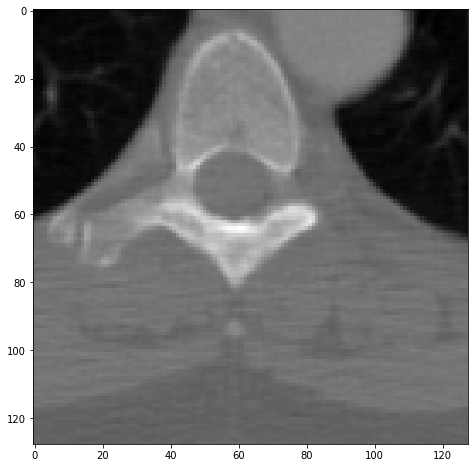

In [3]:
arr = ds.pixel_array
print(arr.shape)
I = arr

plt.imshow(I, cmap="gray")
plt.show()

In [4]:
ds.AcquisitionTime

'112936'

In [15]:
import cv2

I = cv2.imread('xray.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = cv2.resize(I, (128, 128))

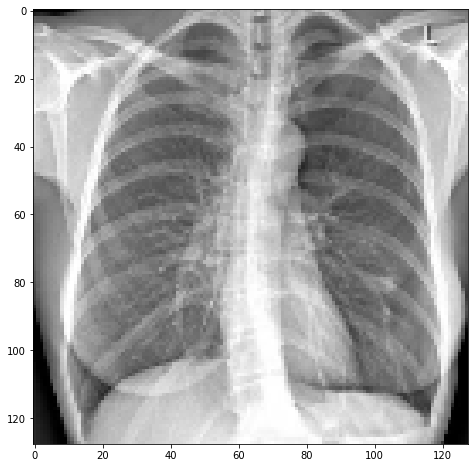

In [16]:
plt.imshow(I, cmap = 'gray')

In [17]:
I.shape

(128, 128)

In [18]:
f = np.fft.fft2(I)

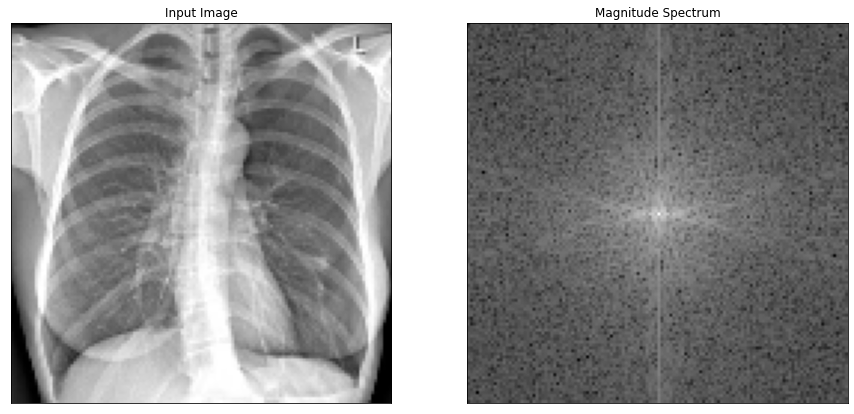

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def show_fourier(I):
    img = I
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift) + 1e-6)

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

show_fourier(I)

In [10]:
def high_pass_filter(img, x_lim, y_lim):
    rows, cols = img.shape
    crow,ccol = rows/2 , cols/2
    crow = np.int32(crow)
    ccol = np.int32(ccol)

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    fshift[(crow-x_lim):(crow+x_lim+1), (ccol-y_lim):(ccol+y_lim+1)] = 0
    
    #fshift = fshift/(x_lim*y_lim)
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)
    return(img_back)

def low_pass_filter(img, x_lim, y_lim):
    return(img - high_pass_filter(img, x_lim, y_lim))

def band_pass_filter(img, x_center, y_center, x_width, y_width):
    I1 = low_pass_filter(img, x_center-x_width, y_center-y_width)
    I2 = low_pass_filter(img, x_center+x_width, y_center+y_width)
    
    return(I2 - I1)



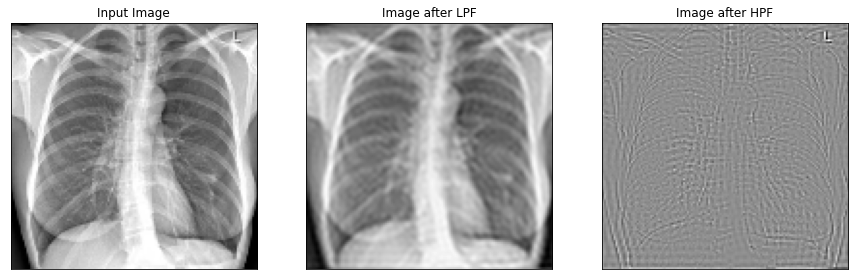

In [20]:
x_lim = 30
y_lim = 30

img = I
img_hp = high_pass_filter(img, x_lim=x_lim, y_lim=y_lim)
img_lp = low_pass_filter(img, x_lim=x_lim, y_lim=y_lim)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_lp, cmap = 'gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_hp, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])


plt.show()

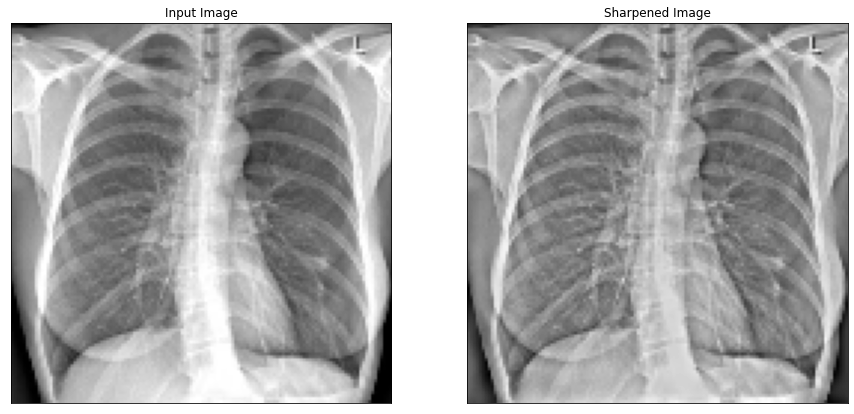

In [21]:
x_lim = 10
y_lim = 10

img = I
img_hp = high_pass_filter(img, x_lim=x_lim, y_lim=y_lim)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap='gray')

plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Sharpened Image'), plt.xticks([]), plt.yticks([])
plt.imshow(img + 1 * img_hp, cmap='gray')

(Text(0.5, 1.0, 'Sharpened Image'), ([], []), ([], []))

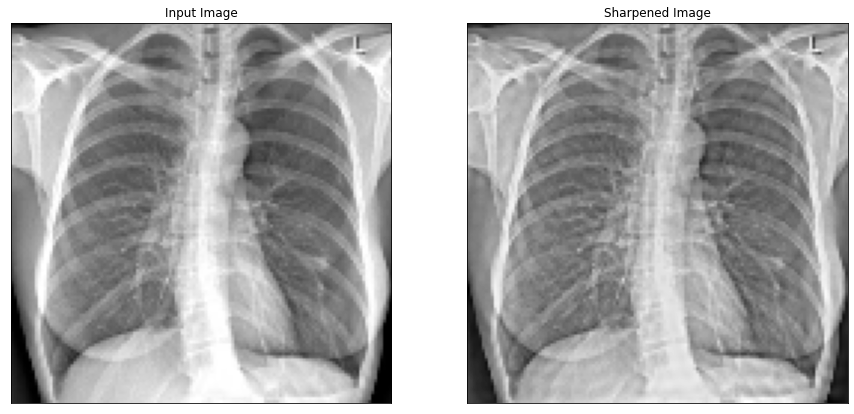

In [31]:
img_lp = low_pass_filter(img, x_lim=4, y_lim=4)
img_bp1 = band_pass_filter(img, x_center=4, y_center=4, x_width=3, y_width=3)
img_bp2 = band_pass_filter(img, x_center=10, y_center=10, x_width=3, y_width=3)
img_bp3 = band_pass_filter(img, x_center=16, y_center=16, x_width=3, y_width=3)
img_bp4 = band_pass_filter(img, x_center=22, y_center=22, x_width=3, y_width=3)
img_hp = high_pass_filter(img, x_lim=25, y_lim=25)



plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(img + img_bp1 * 0.0 + img_bp2 * 0.0 + img_bp3 * 0.0 + img_bp4 * 1.0 + img_hp * 0.5, cmap='gray')
plt.title('Sharpened Image'), plt.xticks([]), plt.yticks([])

In [25]:
img_lp = low_pass_filter(img, x_lim=4, y_lim=4) 
img_bp1 = band_pass_filter(img, x_center=4, y_center=4, x_width=3, y_width=3) 
img_bp2 = band_pass_filter(img, x_center=7, y_center=7, x_width=3, y_width=3) 
img_bp3 = band_pass_filter(img, x_center=10, y_center=10, x_width=3, y_width=3) 
img_bp4 = band_pass_filter(img, x_center=13, y_center=13, x_width=3, y_width=3) 
img_hp = high_pass_filter(img, x_lim=13, y_lim=13)

(Text(0.5, 1.0, 'Input Image'), ([], []), ([], []))

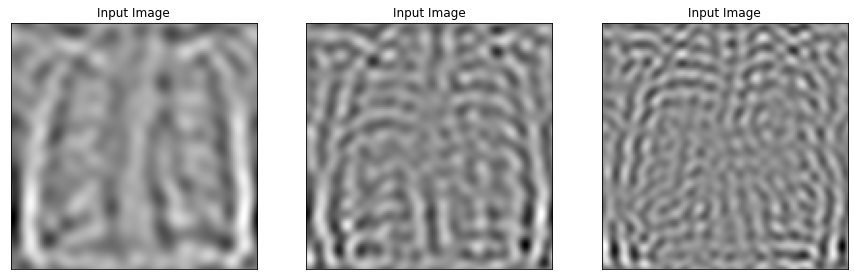

In [26]:
plt.subplot(131)
plt.imshow(img_bp2, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(img_bp3, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(img_bp4, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sharpened Image'), ([], []), ([], []))

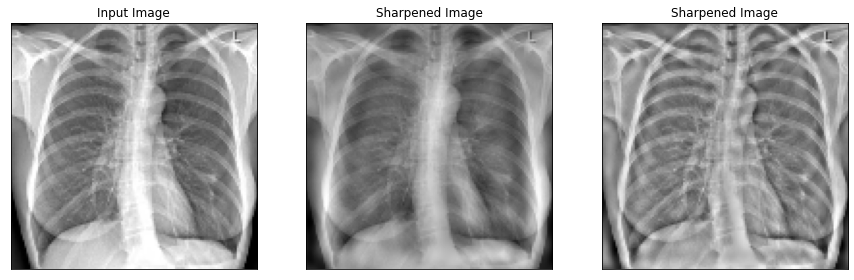

In [29]:
img_lp = low_pass_filter(img, x_lim=4, y_lim=4) 
img_bp1 = band_pass_filter(img, x_center=4, y_center=4, x_width=3, y_width=3) 
img_bp2 = band_pass_filter(img, x_center=7, y_center=7, x_width=3, y_width=3) 
img_bp3 = band_pass_filter(img, x_center=10, y_center=10, x_width=3, y_width=3) 
img_bp4 = band_pass_filter(img, x_center=13, y_center=13, x_width=3, y_width=3) 
img_hp = high_pass_filter(img, x_lim=13, y_lim=13)

plt.subplot(131)
plt.imshow(img, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(img + 2 * img_bp1 + 2 * img_bp2 + 0.0 * img_bp3 + 0.0 * img_bp4 + 1.4 * img_hp, cmap='gray') 
plt.title('Sharpened Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(img + 0.0 * img_bp1 + 0.0 * img_bp2 + 1.5 * img_bp3 + 1.5 * img_bp4 + 1.4 * img_hp, cmap='gray') 
plt.title('Sharpened Image'), plt.xticks([]), plt.yticks([])